In [1]:
# Dependancies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# File to load
life_load2015 = Path("Resources/IHME_2015_BOTH.csv")
life_load2016 = Path("Resources/IHME_2016_BOTH.csv")
life_load2017 = Path("Resources/IHME_2017_BOTH.csv")
life_load2018 = Path("Resources/IHME_2018_BOTH.csv")
life_load2019 = Path("Resources/IHME_2019_BOTH.csv")
life_loadFEM = Path("Resources/IHME_2019_Female.csv")
life_loadMale = Path("Resources/IHME_2019_Male.csv")

#read data and store into panda DataFrame
DF2015 = pd.read_csv(life_load2015)      
DF2016 = pd.read_csv(life_load2016) 
DF2017 = pd.read_csv(life_load2017) 
DF2018 = pd.read_csv(life_load2018) 
DF2019 = pd.read_csv(life_load2019)
DFFemale = pd.read_csv(life_loadFEM)
DFMale = pd.read_csv(life_loadMale)

In [2]:
# Merge Data for each year
dfs_to_merge = [DF2015, DF2016, DF2017, DF2018, DF2019]

#Merge Data for Sex
genderDFs = [DFFemale, DFMale]
merged_df = pd.concat(dfs_to_merge, axis=0, join='inner', ignore_index=True)
genderMerged_df = pd.concat(genderDFs, axis=0, join='inner', ignore_index=True)

In [3]:
# Clean DataFrame to reflect only Travis, San Francisco, Mecklenburg, and Denver County. 
clean_df = merged_df.query("location_name == 'Travis County (Texas)' | location_name == 'Mecklenburg County (North Carolina)' | location_name == 'San Francisco County (California)' | location_name == 'Denver County (Colorado)'")
cleanGender_df = genderMerged_df.query("location_name == 'Travis County (Texas)' | location_name == 'Mecklenburg County (North Carolina)' | location_name == 'San Francisco County (California)' | location_name == 'Denver County (Colorado)'")
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 23136 to 1786787
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     2280 non-null   int64  
 1   measure_name   2280 non-null   object 
 2   location_id    2280 non-null   int64  
 3   location_name  2280 non-null   object 
 4   fips           2280 non-null   float64
 5   race_id        2280 non-null   int64  
 6   race_name      2280 non-null   object 
 7   sex_id         2280 non-null   int64  
 8   sex_name       2280 non-null   object 
 9   age_group_id   2280 non-null   int64  
 10  age_name       2280 non-null   object 
 11  year           2280 non-null   int64  
 12  metric_id      2280 non-null   int64  
 13  metric_name    2280 non-null   object 
 14  val            2280 non-null   float64
 15  upper          2280 non-null   float64
 16  lower          2280 non-null   float64
dtypes: float64(4), int64(7), object(6)
memory usage: 3

In [4]:
# delete extraneous columns
lifeExpectancy_df = clean_df.drop(columns=['measure_id', 'measure_name','location_id', 'sex_name', 'sex_id', 'fips', 'metric_id', 'metric_name', 'upper', 'lower'])
lifeExpectancy_df = lifeExpectancy_df.rename(columns={"location_name":"County",
                                                      "race_name": "Race",
                                                      "age_name": "Age Group",
                                                      "year": "Year",
                                                      "val": "Life Expectancy"})

genderlifeExpectancy_df = cleanGender_df.drop(columns=['measure_id', 'measure_name','location_id','fips', 'metric_id', 'metric_name', 'upper', 'lower'])
genderlifeExpectancy_df = genderlifeExpectancy_df.rename(columns={"location_name":"County",
                                                      "race_name": "Race",
                                                      "sex_name": "Sex",  
                                                      "age_name": "Age Group",            
                                                      "year": "Year",
                                                      "val": "Life Expectancy"})
lifeExpectancy_df.head()

,County,race_id,Race,age_group_id,Age Group,Year,Life Expectancy
23136,San Francisco County (California),1,Total,28,<1 year,2015,82.683545
23137,San Francisco County (California),2,Latino,28,<1 year,2015,82.512680
23138,San Francisco County (California),4,Black,28,<1 year,2015,71.759737
23139,San Francisco County (California),5,White,28,<1 year,2015,82.096319
23140,San Francisco County (California),6,AIAN,28,<1 year,2015,69.314642


In [5]:
genderlifeExpectancy_df.head()

,County,race_id,Race,sex_id,Sex,age_group_id,Age Group,Year,Life Expectancy
23136,San Francisco County (California),1,Total,2,Female,28,<1 year,2019,86.447836
23137,San Francisco County (California),2,Latino,2,Female,28,<1 year,2019,86.581729
23138,San Francisco County (California),4,Black,2,Female,28,<1 year,2019,76.352580
23139,San Francisco County (California),5,White,2,Female,28,<1 year,2019,85.886565
23140,San Francisco County (California),6,AIAN,2,Female,28,<1 year,2019,NaN


In [6]:
# Filter for only life expectancy at birth

lifeExpectancyAtBirth_df = lifeExpectancy_df.loc[(lifeExpectancy_df["age_group_id"] == 28)]
genderLE_atBirth = genderlifeExpectancy_df.loc[(lifeExpectancy_df["age_group_id"] == 28)]
lifeExpectancyAtBirth_df.head()

,County,race_id,Race,age_group_id,Age Group,Year,Life Expectancy
23136,San Francisco County (California),1,Total,28,<1 year,2015,82.683545
23137,San Francisco County (California),2,Latino,28,<1 year,2015,82.512680
23138,San Francisco County (California),4,Black,28,<1 year,2015,71.759737
23139,San Francisco County (California),5,White,28,<1 year,2015,82.096319
23140,San Francisco County (California),6,AIAN,28,<1 year,2015,69.314642


In [7]:
genderLE_atBirth.head()

,County,race_id,Race,sex_id,Sex,age_group_id,Age Group,Year,Life Expectancy
23136,San Francisco County (California),1,Total,2,Female,28,<1 year,2019,86.447836
23137,San Francisco County (California),2,Latino,2,Female,28,<1 year,2019,86.581729
23138,San Francisco County (California),4,Black,2,Female,28,<1 year,2019,76.352580
23139,San Francisco County (California),5,White,2,Female,28,<1 year,2019,85.886565
23140,San Francisco County (California),6,AIAN,2,Female,28,<1 year,2019,NaN


In [8]:
# Filter for Counties

AUS_DF = lifeExpectancyAtBirth_df.query("County == 'Travis County (Texas)'")
SFO_DF = lifeExpectancyAtBirth_df.query("County == 'San Francisco County (California)'")
CLT_DF = lifeExpectancyAtBirth_df.query("County =='Mecklenburg County (North Carolina)'")
DEN_DF = lifeExpectancyAtBirth_df.query("County == 'Denver County (Colorado)'")

In [9]:
# Filter for Total of Population
Race = lifeExpectancyAtBirth_df.query("race_id == 1 ")

In [10]:
# Data Frame for 2019 life expectancy of total population

CityAvg_2019LE_DF = Race.loc[(Race["Year"] == 2019)]
CityAvg_2019LE_DF = CityAvg_2019LE_DF.drop(columns = ["race_id", "Race", "age_group_id", 'Age Group'])
CityAvg_2019LE_DF = CityAvg_2019LE_DF.set_index("Year")
CityAvg_2019LE_DF

,County,Life Expectancy
Year,,
2019,San Francisco County (California),83.656884
2019,Denver County (Colorado),80.268922
2019,Mecklenburg County (North Carolina),80.561983
2019,Travis County (Texas),81.579912


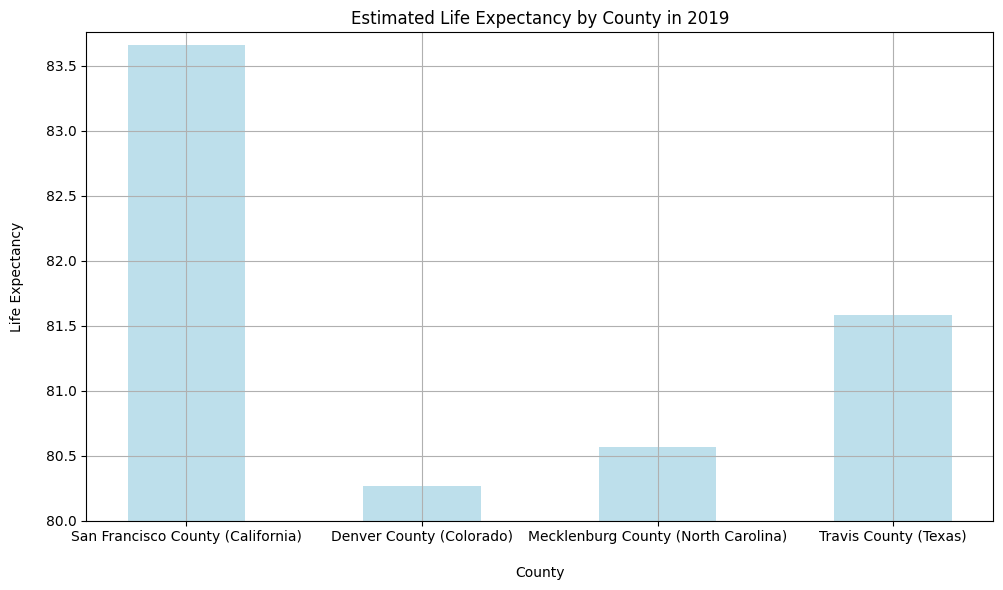

In [45]:
# Create Bar Graph

plt.figure(figsize=(10, 6))

area = CityAvg_2019LE_DF["County"]

y_axis = CityAvg_2019LE_DF["Life Expectancy"]
x_axis = np.arange(len(y_axis))


plt.bar(x_axis, y_axis, width=.5, color='lightblue', alpha=0.8, align="center")

# Create x and y axis labels
plt.xlabel("\nCounty")
plt.ylabel("Life Expectancy\n")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, area, rotation=0, ha='center', wrap=True)

plt.title("Estimated Life Expectancy by County in 2019")
plt.tight_layout()

# Set Limits
plt.ylim(80, max(y_axis)+0.10)
plt.grid(True)


plt.savefig("Output/Estimate2019.png")
plt.show()

In [12]:
Years = AUS_DF["Year"].unique().astype(str)

AusLatinx = AUS_DF.loc[(AUS_DF['race_id'] == 2)]
AusLELatinx = AusLatinx["Life Expectancy"]

AusBlack = AUS_DF.loc[(AUS_DF['race_id'] == 4)]
AusLEBlack = AusBlack["Life Expectancy"]

AusWhite = AUS_DF.loc[(AUS_DF['race_id'] == 5)]
AusLEWhite = AusWhite["Life Expectancy"]

AusAIAN= AUS_DF.loc[(AUS_DF['race_id'] == 6)]
AusLEAIAN = AusAIAN["Life Expectancy"]

AusAPI = AUS_DF.loc[(AUS_DF['race_id'] == 7)]
AusLEAPI = AusAPI["Life Expectancy"]

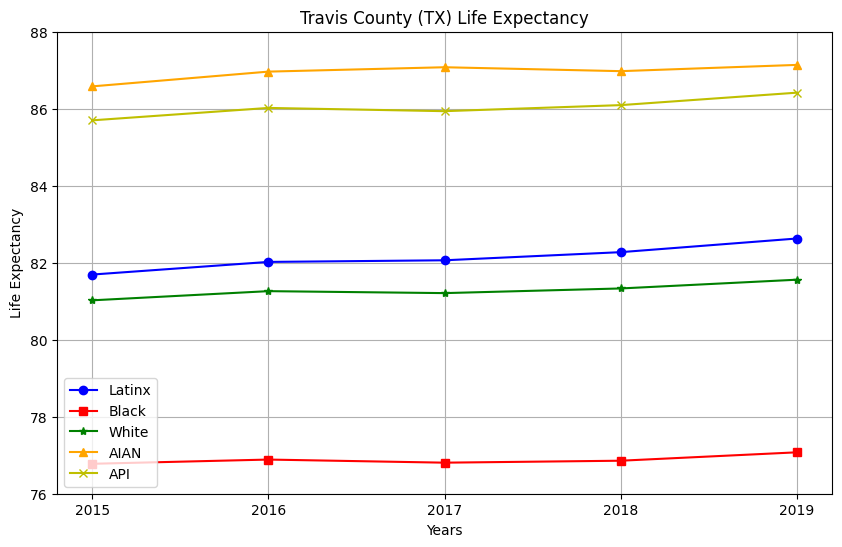

In [13]:
plt.figure(figsize=(10, 6))

# Create line plots for different racial/ethnic groups
Latinx, = plt.plot(Years, AusLELatinx, marker="o", color="b", label="Latinx")
Black, = plt.plot(Years, AusLEBlack, marker="s", color="r", label="Black")
White, = plt.plot(Years, AusLEWhite, marker="*", color="green", label="White")
AIAN, = plt.plot(Years, AusLEAIAN, marker="^", color="orange", label="AIAN")
API, = plt.plot(Years, AusLEAPI, marker="x", color="y", label="API")

# Add a legend to differentiate the lines
plt.legend(handles=[Latinx, Black, White, AIAN, API], loc="best")

# Set the x-axis and y-axis labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")

# Set the plot title
plt.title("Travis County (TX) Life Expectancy")
plt.grid(True)

# Limits
plt.ylim(76, 88)

# Save the Figure
plt.savefig("Output/TravisLE.png")

# Show the plot
plt.show()

In [14]:
Years = SFO_DF["Year"].unique().astype(str)

SfoLatinx = SFO_DF.loc[(SFO_DF['race_id'] == 2)]
SfoLELatinx = SfoLatinx["Life Expectancy"]

SfoBlack = SFO_DF.loc[(SFO_DF['race_id'] == 4)]
SfoLEBlack = SfoBlack["Life Expectancy"]

SfoWhite = SFO_DF.loc[(SFO_DF['race_id'] == 5)]
SfoLEWhite = SfoWhite["Life Expectancy"]

SfoAIAN= SFO_DF.loc[(SFO_DF['race_id'] == 6)]
SfoLEAIAN = SfoAIAN["Life Expectancy"]

SfoAPI = SFO_DF.loc[(SFO_DF['race_id'] == 7)]
SfoLEAPI = SfoAPI["Life Expectancy"]

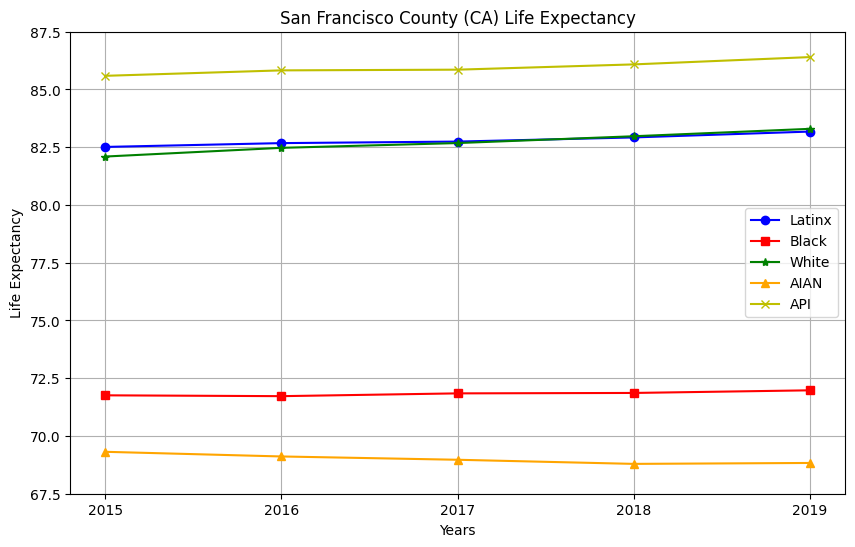

In [15]:
plt.figure(figsize=(10, 6))

# Create line plots for different racial/ethnic groups
Latinx, = plt.plot(Years, SfoLELatinx, marker="o", color="b", label="Latinx")
Black, = plt.plot(Years, SfoLEBlack, marker="s", color="r", label="Black")
White, = plt.plot(Years, SfoLEWhite, marker="*", color="green", label="White")
AIAN, = plt.plot(Years, SfoLEAIAN, marker="^", color="orange", label="AIAN")
API, = plt.plot(Years, SfoLEAPI, marker="x", color="y", label="API")

# Add a legend to differentiate the lines
plt.legend(handles=[Latinx, Black, White, AIAN, API], loc="right")

# Set the x-axis and y-axis labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")

# Set the plot title
plt.title("San Francisco County (CA) Life Expectancy")
plt.grid(True)

# Limits
plt.ylim(67.5, 87.5)

#Save the Figure
plt.savefig("Output/SanFranciscoLE.png")

# Show the plot
plt.show()

In [16]:
Years = CLT_DF["Year"].unique().astype(str)

CltLatinx = CLT_DF.loc[(CLT_DF['race_id'] == 2)]
CltLELatinx = CltLatinx["Life Expectancy"]

CltBlack = CLT_DF.loc[(CLT_DF['race_id'] == 4)]
CltLEBlack = CltBlack["Life Expectancy"]

CltWhite = CLT_DF.loc[(CLT_DF['race_id'] == 5)]
CltLEWhite = CltWhite["Life Expectancy"]

CltAIAN= CLT_DF.loc[(CLT_DF['race_id'] == 6)]
CltLEAIAN = CltAIAN["Life Expectancy"]

CltAPI = CLT_DF.loc[(CLT_DF['race_id'] == 7)]
CltLEAPI = CltAPI["Life Expectancy"]

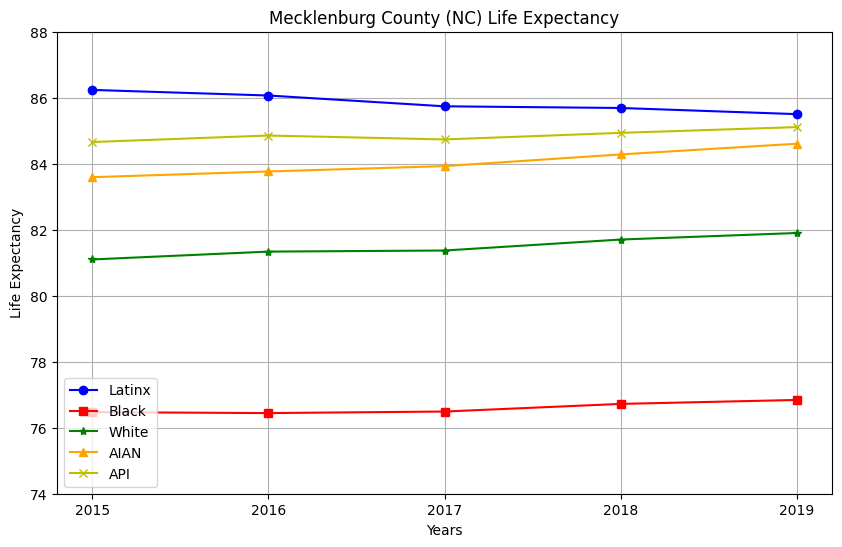

In [17]:
plt.figure(figsize=(10, 6))

# Create line plots for different racial/ethnic groups

Latinx, = plt.plot(Years, CltLELatinx, marker="o", color="b", label="Latinx")
Black, = plt.plot(Years, CltLEBlack, marker="s", color="r", label="Black")
White, = plt.plot(Years, CltLEWhite, marker="*", color="green", label="White")
AIAN, = plt.plot(Years, CltLEAIAN, marker="^", color="orange", label="AIAN")
API, = plt.plot(Years, CltLEAPI, marker="x", color="y", label="API")

# Add a legend to differentiate the lines
plt.legend(handles=[Latinx, Black, White, AIAN, API], loc="best")

# Set the x-axis and y-axis labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")

# Set the plot title
plt.title("Mecklenburg County (NC) Life Expectancy")
plt.grid(True)

# Limits
plt.ylim(74, 88)

# Save the Figure
plt.savefig("Output/MecklenburgLE.png")

# Show the plot
plt.show()

In [19]:
Years = DEN_DF["Year"].unique().astype(str)

DenLatinx = DEN_DF.loc[(DEN_DF['race_id'] == 2)]
DenLELatinx = DenLatinx["Life Expectancy"]

DenBlack = DEN_DF.loc[(DEN_DF['race_id'] == 4)]
DenLEBlack = DenBlack["Life Expectancy"]

DenWhite = DEN_DF.loc[(DEN_DF['race_id'] == 5)]
DenLEWhite = DenWhite["Life Expectancy"]

DenAIAN= DEN_DF.loc[(DEN_DF['race_id'] == 6)]
DenLEAIAN = DenAIAN["Life Expectancy"]

DenAPI = DEN_DF.loc[(DEN_DF['race_id'] == 7)]
DenLEAPI = DenAPI["Life Expectancy"]

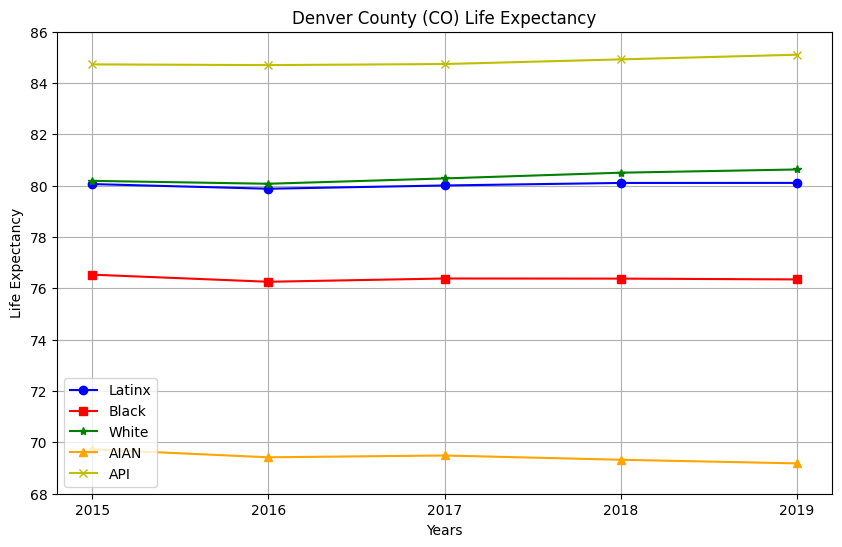

In [44]:
plt.figure(figsize=(10, 6))

# Create line plots for different racial/ethnic groups

Latinx, = plt.plot(Years, DenLELatinx, marker="o", color="b", label="Latinx")
Black, = plt.plot(Years, DenLEBlack, marker="s", color="r", label="Black")
White, = plt.plot(Years, DenLEWhite, marker="*", color="green", label="White")
AIAN, = plt.plot(Years, DenLEAIAN, marker="^", color="orange", label="AIAN")
API, = plt.plot(Years, DenLEAPI, marker="x", color="y", label="API")

# Add a legend to differentiate the lines
plt.legend(handles=[Latinx, Black, White, AIAN, API], loc="lower left")

# Set the x-axis and y-axis labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")

# Set the plot title
plt.title("Denver County (CO) Life Expectancy")
plt.grid(True)

# Limits
plt.ylim(68, 86)

#Save the Figure
plt.savefig("Output/DenverLE.png")

# Show the plot
plt.show()

In [21]:
genderLE_atBirth2019 = genderLE_atBirth.loc[(genderLE_atBirth["Year"] == 2019)]
genderLE_atBirth2019 = genderLE_atBirth.loc[(genderLE_atBirth["race_id"] == 1)]
genderLE_atBirth2019 = genderLE_atBirth2019.drop(columns = ["race_id", "age_group_id", 'Age Group'])
genderLE_atBirth2019

,County,Race,sex_id,Sex,Year,Life Expectancy
23136,San Francisco County (California),Total,2,Female,2019,86.447836
29986,Denver County (Colorado),Total,2,Female,2019,82.543972
221058,Mecklenburg County (North Carolina),Total,2,Female,2019,82.958427
295590,Travis County (Texas),Total,2,Female,2019,83.666875
389076,San Francisco County (California),Total,1,Male,2019,81.007989
395926,Denver County (Colorado),Total,1,Male,2019,77.958198
586998,Mecklenburg County (North Carolina),Total,1,Male,2019,77.910070
661530,Travis County (Texas),Total,1,Male,2019,79.474284


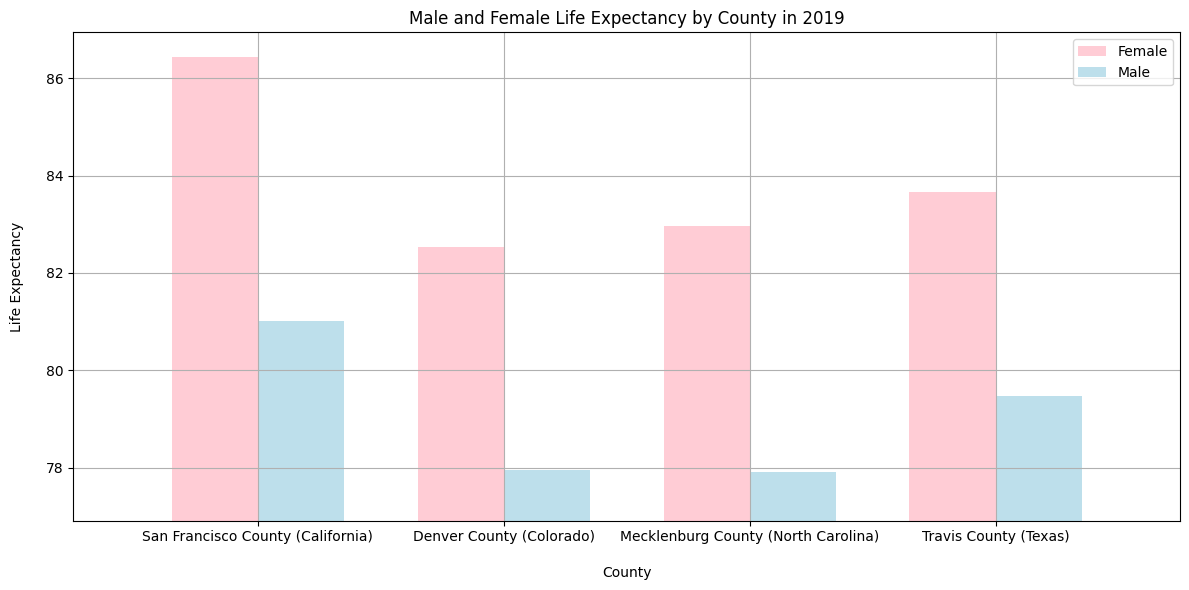

In [50]:
femLE_2019 = genderLE_atBirth2019.loc[(genderLE_atBirth2019['Sex'] == 'Female')]
maleLE_2019 = genderLE_atBirth2019.loc[(genderLE_atBirth2019['Sex'] == 'Male')]
Counties = genderLE_atBirth2019["County"].unique()

female_y_axis = femLE_2019["Life Expectancy"]
male_y_axis = maleLE_2019["Life Expectancy"]
x_axis = np.arange(len(female_y_axis))

plt.figure(figsize=(12, 6))
bar_width = 0.35

Female = plt.bar(x_axis - bar_width/2, female_y_axis, width=0.35, color='pink', alpha=0.8, align="center", label="Female")
Male = plt.bar(x_axis + bar_width/2, male_y_axis, width=0.35, color='lightblue', alpha=0.8, align="center", label="Male")

# LAbel Axis
plt.xlabel("\nCounty")
plt.ylabel("Life Expectancy\n")
plt.title("Male and Female Life Expectancy by County in 2019")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Counties, rotation=0, ha='center', wrap=True)

# Set Limits
plt.ylim(min(male_y_axis-1), max(female_y_axis)+.5)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.grid(True)

plt.legend(handles=[Female, Male], loc="best")
plt.tight_layout()

#Save the Figure
plt.savefig("Output/Gender2019.png")

# Show the plot
plt.show()

In [34]:
# Data Frame for 2019 life expectancy of total population
Race.set_index("Year")
TotalLE = Race.drop(columns = ["race_id", "Race", "age_group_id", 'Age Group'])
TotalLE.set_index("Year")

,County,Life Expectancy
Year,,
2015,San Francisco County (California),82.683545
2015,Denver County (Colorado),79.980574
2015,Mecklenburg County (North Carolina),79.978413
2015,Travis County (Texas),80.976980
2016,San Francisco County (California),82.966769
2016,Denver County (Colorado),79.849618
2016,Mecklenburg County (North Carolina),80.128738
2016,Travis County (Texas),81.235606
2017,San Francisco County (California),83.095621


In [37]:
# Visualize total population estimated life expectancy across 2015 - 2019
Years = TotalLE["Year"].unique().astype(str)

DenLocation = TotalLE.loc[(TotalLE['County'] == "Denver County (Colorado)")]
DenTotal = DenLocation["Life Expectancy"]

SFOLocation = TotalLE.loc[(TotalLE['County'] == "San Francisco County (California)")]
SFOTotal = SFOLocation["Life Expectancy"]

AUSLocation = TotalLE.loc[(TotalLE['County'] == "Travis County (Texas)")]
AUSTotal = AUSLocation["Life Expectancy"]

CLTLocation = TotalLE.loc[(TotalLE['County'] == "Mecklenburg County (North Carolina)")]
CLTTotal = CLTLocation["Life Expectancy"]

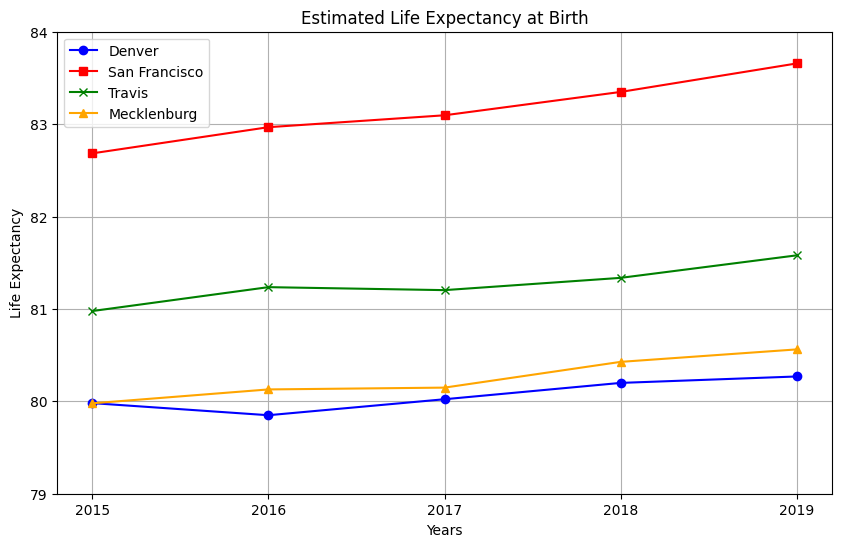

In [43]:
plt.figure(figsize=(10, 6))

# Create line plots for different racial/ethnic groups

Denver, = plt.plot(Years, DenTotal, marker="o", color="b", label="Denver")
SanFrancisco, = plt.plot(Years, SFOTotal, marker="s", color="r", label="San Francisco")
Travis, = plt.plot(Years, AUSTotal, marker="x", color="green", label="Travis")
Mecklenburg, = plt.plot(Years, CLTTotal, marker="^", color="orange", label="Mecklenburg")

# Add a legend to differentiate the lines
plt.legend(handles=[Denver, SanFrancisco, Travis, Mecklenburg], loc="best")

# Set the x-axis and y-axis labels
plt.xlabel("Years")
plt.ylabel("Life Expectancy")

# Set the plot title
plt.title("Estimated Life Expectancy at Birth")
plt.grid(True)

# Limits
plt.ylim(79, 84)

# Save Figure
plt.savefig("Output/TotalEstimated.png")